# Aceleradev Codenation - Semana 3
## Túlio Vieira de Souza | Data Scientist

dados : https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

Colunas 

- city : Cidade onde o imóvel está localizada / City where the property is located
- area : Area do imovel / Property area
- rooms: Numero de quartos/ Quantity of rooms
- bathroom: Numero de banheiros / Quantity of bathroom
- parking spaces : Numero de vagas / Quantity of parking spaces
- floor : Andar / Floor
- animal : Aceita animais? / Acept animals?
- furniture : Mobilhada? / Furniture?
- hoa (RS): Valor do condomínio / Homeowners association tax 
- rent amount (RS) : Valor do Aluguel (/) Rent amount 
- property tax (RS) : IPTU (/) Property tax
- fire insurance (RS) : Seguro Incendio / Fire Insurance
- total (RS) : Valor total / Total

### Importando os pacotes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('houses_to_rent_v2.csv')

In [3]:
df.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


# Problema : Explorar o valor do aluguel (rent amount RS)

## Estatística univariada

In [6]:
df.dtypes.value_counts()

int64     9
object    4
dtype: int64

In [7]:
df.rename(columns = {'rent amount (R$)' : 'valor_aluguel'}, inplace = True)

In [8]:
df['valor_aluguel'].mean()

3896.247194163861

In [9]:
df['valor_aluguel'].median()

2661.0

In [10]:
df['valor_aluguel'].std()

3408.5455176710675

In [11]:
df['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

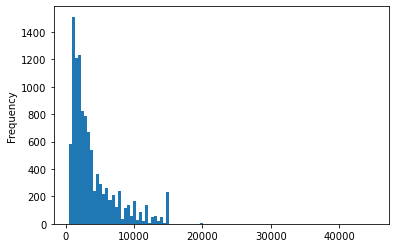

In [12]:
df['valor_aluguel'].plot(kind = 'hist', bins= 100)

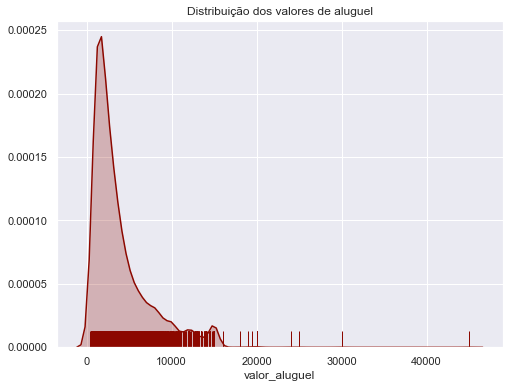

<Figure size 432x288 with 0 Axes>

In [13]:
sns.set(style = "white", palette = 'winter')
sns.set(style = 'darkgrid', palette = 'dark')
fig, ax = plt.subplots(figsize = (8,6))
sns.distplot(df["valor_aluguel"], hist = False, rug = True, color = 'r', kde_kws = {'shade' : True} ,ax = ax)
ax.set(xlabel = 'valor_aluguel',
       title = "Distribuição dos valores de aluguel")
plt.show()
plt.clf()

In [14]:
#skewness positive skew
df.valor_aluguel.skew()

1.8388773035440982

In [15]:
#kurtose - leptocurtica
df.valor_aluguel.kurtosis()


4.624228179818687

## Exploracão multivariáveis

### Perguntas
 
- Qual a cidade com a média de aluguel mais cara? 
- Quantos banheiros existem nas residencias com alugueis mais altos? 
- Os imóveis mais caros aceitam animal? 
- Os imóveis mais caros são mobiliados? 

In [16]:
#Qual a cidade com a média de aluguel mais alta? 

df.groupby('city')['valor_aluguel'].mean().reset_index().sort_values('valor_aluguel', ascending = False)

,city,valor_aluguel
4,São Paulo,4652.793783
0,Belo Horizonte,3664.127981
3,Rio de Janeiro,3232.904064
1,Campinas,2364.290739
2,Porto Alegre,2337.699916


In [17]:
# Discretização dos valores de aluguel
group_names = ['aluguel_baixo', 'aluguel_médio', 'aluguel_alto', 'aluguel_muito_alto']
df['faixas aluguel'] = pd.qcut(df['valor_aluguel'], 4, labels = group_names)
df['faixas aluguel']

0              aluguel_alto
1              aluguel_alto
2              aluguel_alto
3             aluguel_baixo
4             aluguel_baixo
                ...        
10687         aluguel_baixo
10688    aluguel_muito_alto
10689    aluguel_muito_alto
10690    aluguel_muito_alto
10691         aluguel_baixo
Name: faixas aluguel, Length: 10692, dtype: category
Categories (4, object): [aluguel_baixo < aluguel_médio < aluguel_alto < aluguel_muito_alto]

In [18]:
df[["valor_aluguel", "faixas aluguel"]].head(20).sort_values(by = 'valor_aluguel')

,valor_aluguel,faixas aluguel
11,580,aluguel_baixo
4,800,aluguel_baixo
3,1112,aluguel_baixo
18,1220,aluguel_baixo
6,1900,aluguel_médio
12,2100,aluguel_médio
10,2100,aluguel_médio
9,2300,aluguel_médio
2,2800,aluguel_alto
16,3000,aluguel_alto


In [19]:
df.groupby('faixas aluguel')['bathroom'].mean()

faixas aluguel
aluguel_baixo         1.187034
aluguel_médio         1.657400
aluguel_alto          2.440328
aluguel_muito_alto    3.729027
Name: bathroom, dtype: float64

In [20]:
df.groupby('faixas aluguel')['rooms'].mean()

faixas aluguel
aluguel_baixo         1.707899
aluguel_médio         2.140496
aluguel_alto          2.721411
aluguel_muito_alto    3.495077
Name: rooms, dtype: float64

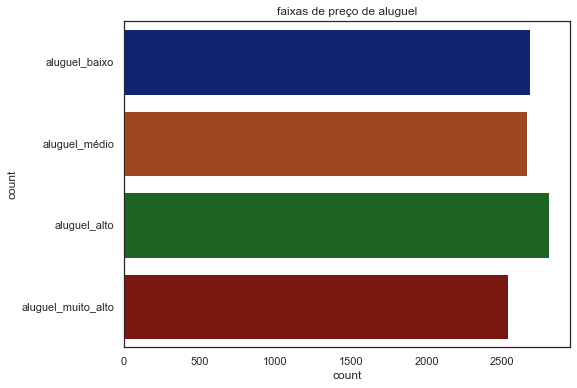

<Figure size 432x288 with 0 Axes>

In [21]:
sns.set(style = 'white', palette = 'dark')
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(y = "faixas aluguel", data = df, ax = ax)
ax.set(ylabel = "count", title = "faixas de preço de aluguel")
plt.show()
plt.clf()

In [22]:
df.groupby('faixas aluguel')[['city', 'bathroom', 'rooms']].max()

,city,bathroom,rooms
faixas aluguel,,,
aluguel_baixo,São Paulo,5,5
aluguel_médio,São Paulo,7,7
aluguel_alto,São Paulo,7,8
aluguel_muito_alto,São Paulo,10,13


In [23]:
#Quantos banheiros existem em média nas residencias com alugueis mais altos? 
## definicao: algueis mais altos são valores acima de 5000

df['aluguel_alto'] = ['Alto' if x > 5000 else 'Baixo' for x in df['valor_aluguel']]


In [24]:
df.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

### Hipóteses

- São Paulo é a cidade com o aluguel mais caro.
- Quanto mais banheiros em um imovel maior o valor do aluguel.
- Os imoveis com mobilia tem o aluguel mais alto. 

In [26]:
df.corr(method = 'pearson')

,area,rooms,bathroom,parking spaces,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.193796,0.226766,0.193983,0.006890,0.180742,0.039059,0.188078,0.051799
rooms,0.193796,1.000000,0.733763,0.617510,0.007139,0.541758,0.075252,0.565148,0.134597
bathroom,0.226766,0.733763,1.000000,0.697379,0.050271,0.668504,0.109253,0.676399,0.208339
parking spaces,0.193983,0.617510,0.697379,1.000000,0.009321,0.578361,0.098378,0.597348,0.148684
hoa (R$),0.006890,0.007139,0.050271,0.009321,1.000000,0.036490,0.007627,0.029535,0.955024
valor_aluguel,0.180742,0.541758,0.668504,0.578361,0.036490,1.000000,0.107884,0.987343,0.264490
property tax (R$),0.039059,0.075252,0.109253,0.098378,0.007627,0.107884,1.000000,0.105661,0.218344
fire insurance (R$),0.188078,0.565148,0.676399,0.597348,0.029535,0.987343,0.105661,1.000000,0.254911
total (R$),0.051799,0.134597,0.208339,0.148684,0.955024,0.264490,0.218344,0.254911,1.000000


In [25]:
df.corr()

,area,rooms,bathroom,parking spaces,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.193796,0.226766,0.193983,0.006890,0.180742,0.039059,0.188078,0.051799
rooms,0.193796,1.000000,0.733763,0.617510,0.007139,0.541758,0.075252,0.565148,0.134597
bathroom,0.226766,0.733763,1.000000,0.697379,0.050271,0.668504,0.109253,0.676399,0.208339
parking spaces,0.193983,0.617510,0.697379,1.000000,0.009321,0.578361,0.098378,0.597348,0.148684
hoa (R$),0.006890,0.007139,0.050271,0.009321,1.000000,0.036490,0.007627,0.029535,0.955024
valor_aluguel,0.180742,0.541758,0.668504,0.578361,0.036490,1.000000,0.107884,0.987343,0.264490
property tax (R$),0.039059,0.075252,0.109253,0.098378,0.007627,0.107884,1.000000,0.105661,0.218344
fire insurance (R$),0.188078,0.565148,0.676399,0.597348,0.029535,0.987343,0.105661,1.000000,0.254911
total (R$),0.051799,0.134597,0.208339,0.148684,0.955024,0.264490,0.218344,0.254911,1.000000


In [27]:
from scipy import stats

In [28]:
pearson_coef, p_value = stats.pearsonr(df['valor_aluguel'], df['bathroom'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.6685043667013937  with a P-value of P =  0.0


In [29]:
df[['valor_aluguel', 'bathroom']].corr(method = 'pearson').round(3)

,valor_aluguel,bathroom
valor_aluguel,1.000,0.669
bathroom,0.669,1.000


In [30]:
aux = pd.DataFrame({'colunas' : df.columns, 'tipos' : df.dtypes})
aux

,colunas,tipos
city,city,object
area,area,int64
rooms,rooms,int64
bathroom,bathroom,int64
parking spaces,parking spaces,int64
floor,floor,object
animal,animal,object
furniture,furniture,object
hoa (R$),hoa (R$),int64
valor_aluguel,valor_aluguel,int64


In [31]:
lista = list(aux[aux['tipos'] == 'int64']['colunas'])
lista

['area',
 'rooms',
 'bathroom',
 'parking spaces',
 'hoa (R$)',
 'valor_aluguel',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

In [32]:
for coluna in lista:
    print(coluna)
    print(df[['valor_aluguel', coluna]].corr(method = 'pearson'))

area
               valor_aluguel      area
valor_aluguel       1.000000  0.180742
area                0.180742  1.000000
rooms
               valor_aluguel     rooms
valor_aluguel       1.000000  0.541758
rooms               0.541758  1.000000
bathroom
               valor_aluguel  bathroom
valor_aluguel       1.000000  0.668504
bathroom            0.668504  1.000000
parking spaces
                valor_aluguel  parking spaces
valor_aluguel        1.000000        0.578361
parking spaces       0.578361        1.000000
hoa (R$)
               valor_aluguel  hoa (R$)
valor_aluguel        1.00000   0.03649
hoa (R$)             0.03649   1.00000
valor_aluguel
               valor_aluguel  valor_aluguel
valor_aluguel            1.0            1.0
valor_aluguel            1.0            1.0
property tax (R$)
                   valor_aluguel  property tax (R$)
valor_aluguel           1.000000           0.107884
property tax (R$)       0.107884           1.000000
fire insurance (R$)
          

## Visualização de dados

In [39]:
df_cor =  df[lista].drop('total (R$)', axis = 1)
df_cor.columns

Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
       'valor_aluguel', 'property tax (R$)', 'fire insurance (R$)'],
      dtype='object')

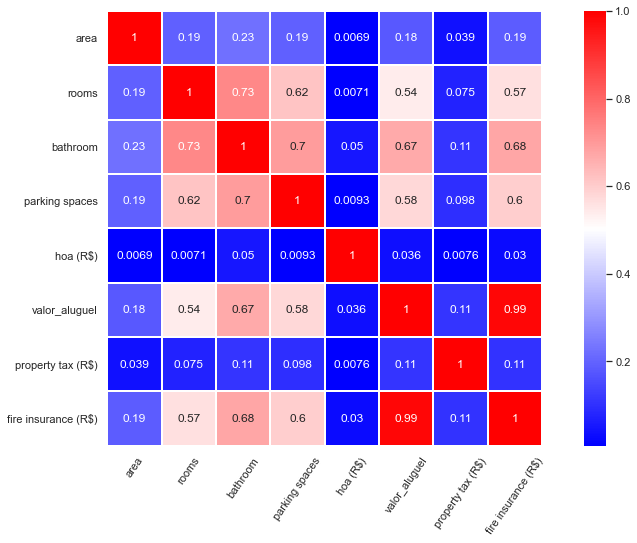

<Figure size 432x288 with 0 Axes>

In [44]:
# Plotando a matrix de correlação para os dados da lista
sns.set(style = "white")
correlation = df_cor.corr()
#matrix = np.tril(correlation)
f,ax = plt.subplots(figsize = (15, 8))
sns.heatmap(correlation, annot = True, fmt = ".2g", cmap = "bwr", linewidths =1, linecolor = "white",
           square = True)
plt.xticks(rotation = 55)
plt.show()
plt.clf()

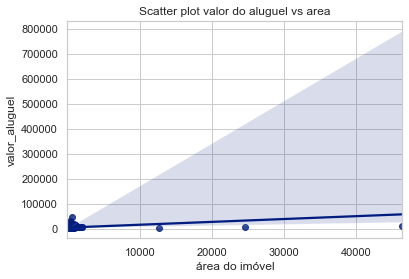

<Figure size 432x288 with 0 Axes>

In [45]:
# Engine size como potencial preditor da variável price
sns.set(style = 'whitegrid', palette = 'dark')
fig, ax = plt.subplots(figsize = (6,4))
sns.regplot(x = "area", y = "valor_aluguel", data = df,ax = ax)
ax.set(xlabel = "área do imóvel", ylabel = "valor_aluguel", title = "Scatter plot valor do aluguel vs area")
plt.show()
plt.clf()

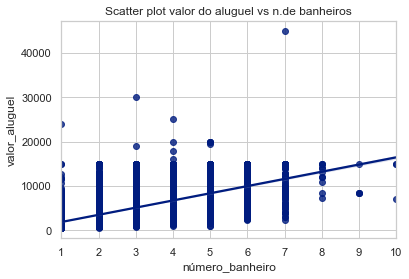

<Figure size 432x288 with 0 Axes>

In [47]:
# Engine size como potencial preditor da variável price
sns.set(style = 'whitegrid', palette = 'dark')
fig, ax = plt.subplots(figsize = (6,4))
sns.regplot(x = "bathroom", y = "valor_aluguel", data = df,ax = ax)
ax.set(xlabel = "número_banheiro", ylabel = "valor_aluguel", title = "Scatter plot valor do aluguel vs n.de banheiros")
plt.show()
plt.clf()

In [ ]:
# Engine size como potencial preditor da variável price
sns.set(style = 'whitegrid', palette = 'dark')
fig, ax = plt.subplots(figsize = (6,4))
sns.regplot(x = "area", y = "valor_aluguel", data = df,ax = ax)
ax.set(xlabel = "área do imóvel", ylabel = "valor_aluguel", title = "Scatter plot valor do aluguel vs area")
plt.show()
plt.clf()